# Importing all the necessary library and tools

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
R = Ridge()

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn

The dataset below is the data from a school where students are analyzed in first grades and their alcoholic behaviours

In [2]:
#reading the dataset
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#analysis of all the attributes
list(data.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

here is the explanation of each column of the data set and its necessary meaning

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade),2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
#finding null values
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There arent any missing values in our dataset

In [5]:
data.shape

(395, 33)

There are 33 attributes with 395 data in our dataset

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

we have alot of data which can be categorized in binary form but we only need some data column for our prediction output

<AxesSubplot:xlabel='sex', ylabel='count'>

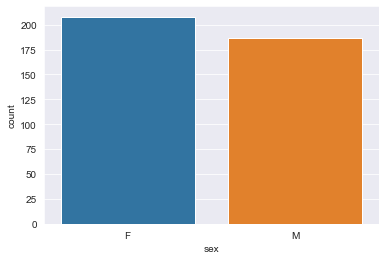

In [9]:
#checking number of gender class
sns.set_style('darkgrid')
sns.countplot(x= "sex", data=data)

There are higher number of females than male in school

In [10]:
dict(data['sex'].value_counts())

{'F': 208, 'M': 187}

<AxesSubplot:xlabel='famsize', ylabel='count'>

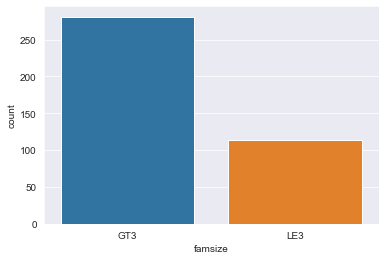

In [11]:
#checking family size categorized as greater than 3 and less than 3
sns.countplot(x="famsize", data= data)

This shows students majorly have family of Greater than 3 members

In [12]:
dict(data['famsize'].value_counts())

{'GT3': 281, 'LE3': 114}

<AxesSubplot:xlabel='age'>

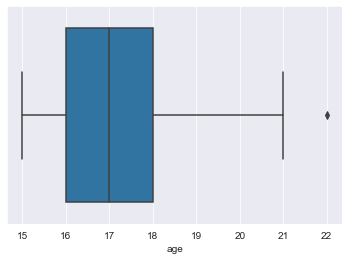

In [13]:
#checking age groups
sns.boxplot(x= data['age'])

From this we can see students are aged 16 to 18 in that particular region

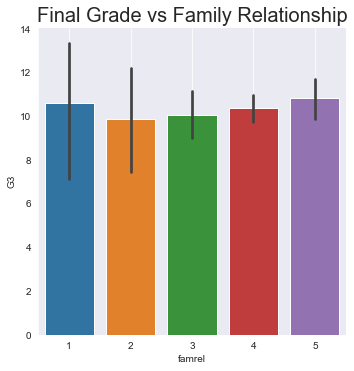

In [14]:
#final grade and family relationshop chart
sns.catplot(y='G3',x='famrel',data=data,kind='bar')
plt.title('Final Grade vs Family Relationship',size=20)
plt.grid()

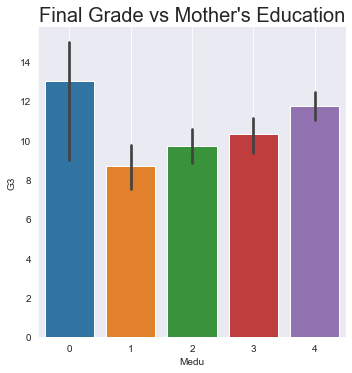

In [15]:
#final grade and mothers education chart
sns.catplot(y='G3',x='Medu',data=data,kind='bar')
plt.title('Final Grade vs Mother\'s Education',size=20)
plt.grid()

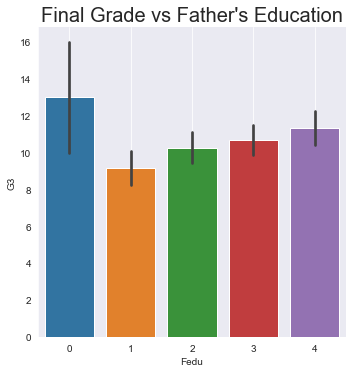

In [16]:
#final grade and fathers education chart
sns.catplot(y='G3',x='Fedu',data=data,kind='bar')
plt.title('Final Grade vs Father\'s Education',size=20)
plt.grid()

In [17]:
#checking null value
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [18]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### Now lets check non numeric value in our dataset.

In [19]:
nonnumeric_columns = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [20]:
for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [21]:
# Assigning new variable for data manupulation
df = data

In [22]:
#converting following columns by multiplying with anonymous function known as lambda
df['Mjob'] = df['Mjob'].apply(lambda x: "m_" + x)
df['Fjob'] = df['Fjob'].apply(lambda x: "f_" + x)
df['reason'] = df['reason'].apply(lambda x: "r_" + x)
df['guardian'] = df['guardian'].apply(lambda x: "g_" + x)

In [23]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,m_services,f_services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,m_services,f_services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,m_other,f_other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,m_services,f_other,...,4,4,1,3,4,5,0,11,12,10


In [24]:
#Creating dummy element 
dummies = pd.concat([pd.get_dummies(df['Mjob']),
                     pd.get_dummies(df['Fjob']),
                     pd.get_dummies(df['reason']),
                     pd.get_dummies(df['guardian'])],
                     axis=1)

In [25]:
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [26]:
#connecting dummy elements and dropping the old column
df = pd.concat([df, dummies], axis=1)

df.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

In [27]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,MS,M,17,U,LE3,T,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,MS,M,21,R,GT3,T,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,MS,M,18,R,LE3,T,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [28]:
nonnumeric_columns = [df.columns[index] for index, dtype in enumerate(df.dtypes) if dtype == 'object']

for column in nonnumeric_columns:
    print(f"{column}: {df[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


### Let us now label all the categorical data

In [29]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
    df[column] = encoder.fit_transform(df[column])

In [30]:
for dtype in df.dtypes:
    print(dtype)

int32
int32
int64
int32
int32
int32
int64
int64
int64
int64
int64
int32
int32
int32
int32
int32
int32
int32
int32
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


# Checking the initial grade(G1) and analyzing using linear regression

In [31]:
y = df['G1']
X = df.drop('G1', axis=1)

In [32]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [33]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [34]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,...,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,...,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,-2.938392,-0.685387,-0.479857,-0.643249,-0.042286,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,-1.399970,0.792251,-1.235351,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
392,2.754443,1.054656,3.377047,-1.867789,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
393,2.754443,1.054656,1.023046,-1.867789,1.570004,0.340322,0.229234,-0.479857,2.227751,-1.235351,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908


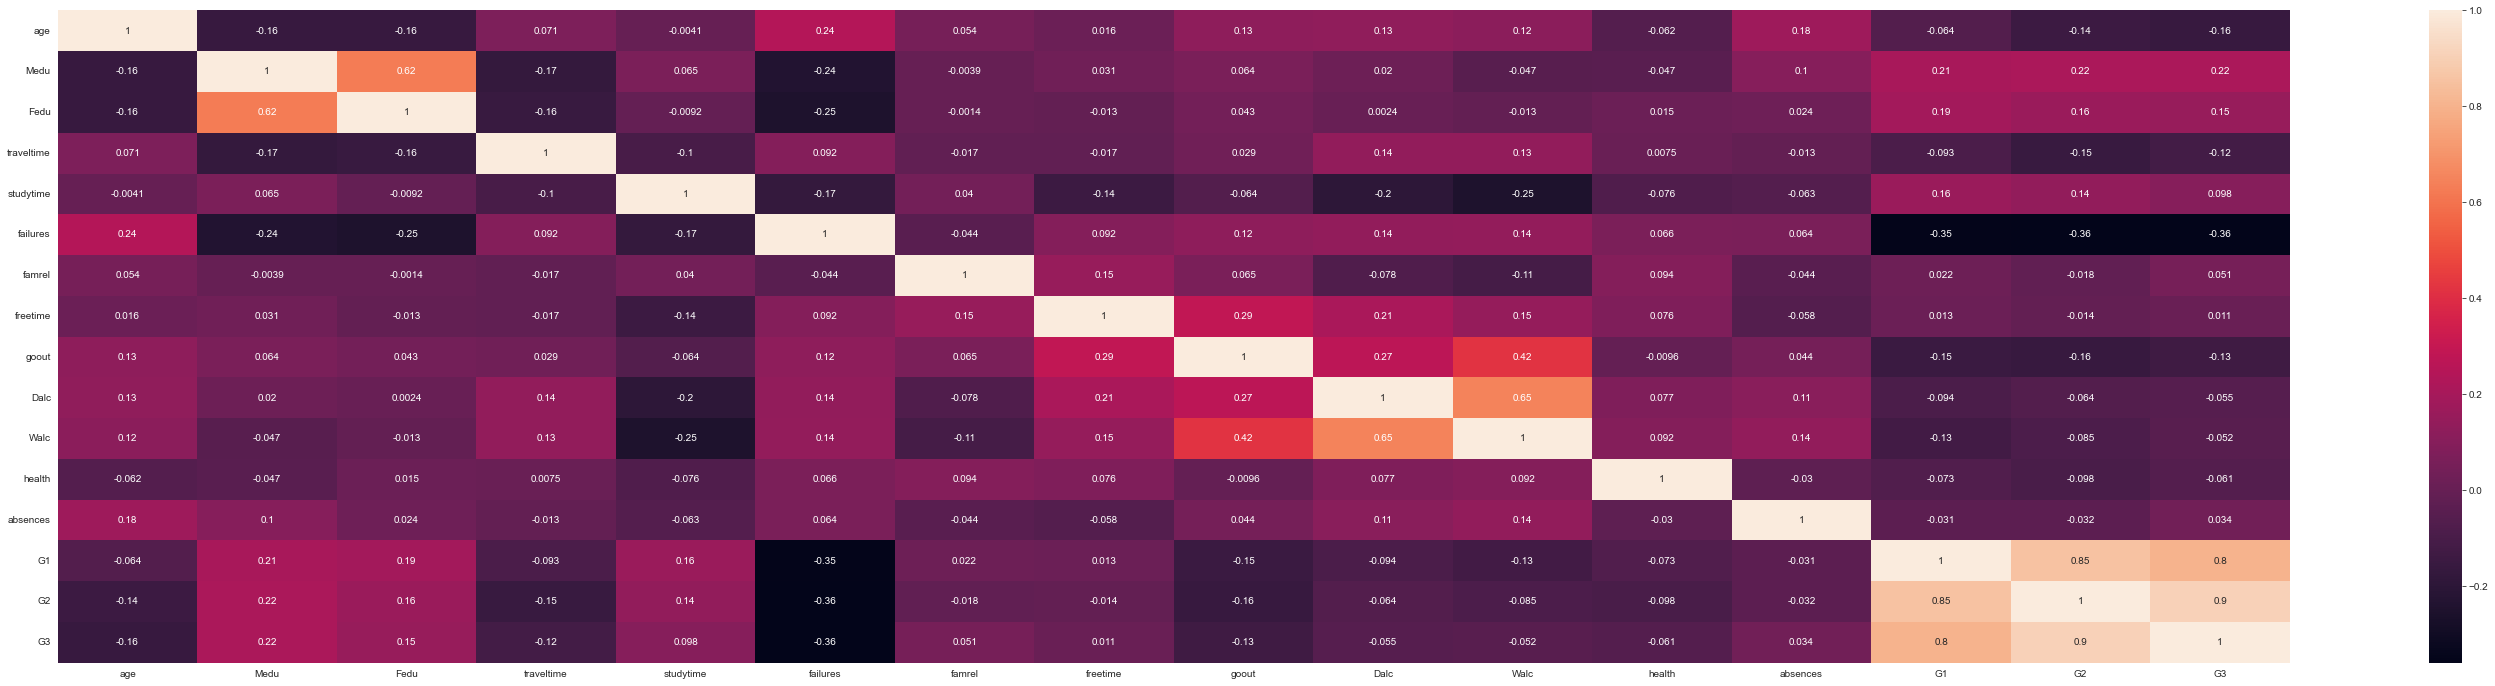

In [35]:
#checking correlation
plt.figure(figsize=(50, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [37]:
#using sklearn library to implement linear regression
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [38]:
print(f"Model R2: {model.score(X_test, y_test)}")

Model R2: 0.7300133651638001


In [39]:
print("R2  :", r2_score(y_test, prediction))
print("MAE :", mean_absolute_error(y_test, prediction))
print("MSE :", mean_squared_error(y_test, prediction))

R2  : 0.7300133651638001
MAE : 1.4399122896150145
MSE : 3.277746329903525


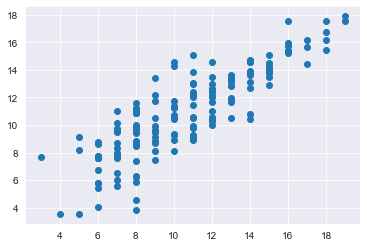

In [40]:
plt.scatter(y_test, prediction)

In [41]:
R.fit(X_train,y_train)
prediction = R.predict(X_test)

In [42]:
R.score(X_test,y_test)

0.7301041226660931

In [43]:
print("R2  :", r2_score(y_test, prediction))
print("MAE :", mean_absolute_error(y_test, prediction))
print("MSE :", mean_squared_error(y_test, prediction))

R2  : 0.7301041226660931
MAE : 1.4403223626602981
MSE : 3.2766444973249134


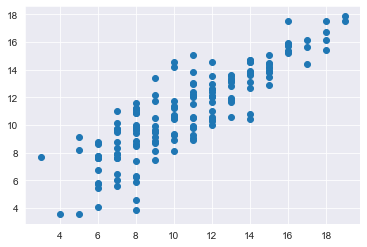

In [44]:
plt.scatter(y_test, prediction)

In [45]:
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)

In [46]:
print("R2  :", r2_score(y_test, prediction))
print("MAE :", mean_absolute_error(y_test, prediction))
print("MSE :", mean_squared_error(y_test, prediction))

R2  : 0.8446085616336658
MAE : 1.1001898734177213
MSE : 1.8865145569620254


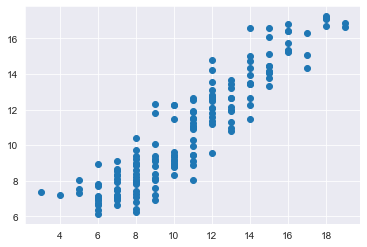

In [47]:
plt.scatter(y_test, prediction)

# Linear regression from scratch

In [48]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10


In [49]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [50]:
X = data['absences'].values
Y = data['traveltime'].values

In [51]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n= len(X)
numerator = 0
denomerator = 0
for i in range(n):
    numerator += (X[i]-mean_x)* (Y[i]-mean_y)
    denomerator += (X[i]-mean_x)** 2
b1 = numerator/denomerator
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

-0.0011281065566616502 1.454541469076638


Text(0, 0.5, 'Daily travel time')

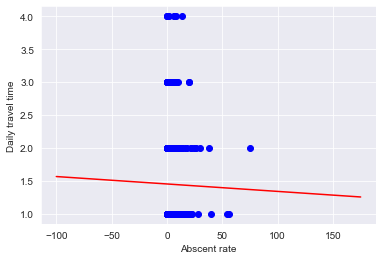

In [52]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = b0+b1*x
plt.plot(x,y,color='red', label = 'regression line')
plt.scatter(X,Y, c="blue", label = "dt")
plt.xlabel("Abscent rate")
plt.ylabel("Daily travel time")

In [53]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0+b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2 = 1-(ss_r/ss_t)
print(r2)

0.00016754131531204752


# Now lets check what we can do with this data

<IPython.core.display.Javascript object>


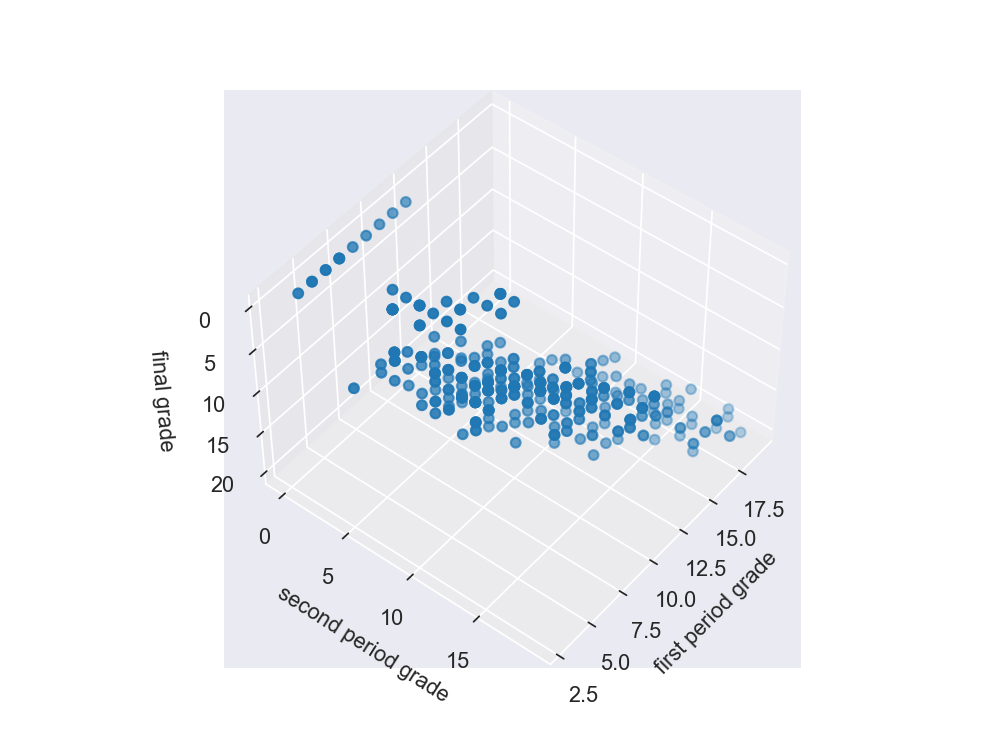

Text(0.5, 0, 'final grade')

In [226]:
#firstly lets 3D plot out grades
%matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(data['G1'],data['G2'],data['G3'])
ax.set_xlabel('first period grade')
ax.set_ylabel('second period grade')
ax.set_zlabel('final grade')

# ax.view_init(0,0)
# ax.view_init(45,215)

In [ ]:
# sns.pairplot(data)

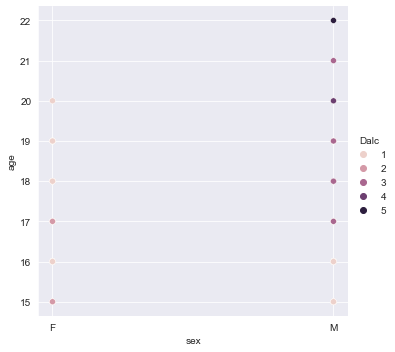

In [54]:

sns.relplot(x= 'sex', y='age',hue = 'Dalc', data= data)

As we can see from graph age 17 is when student starts drinking and peaks at 20 in leave day.

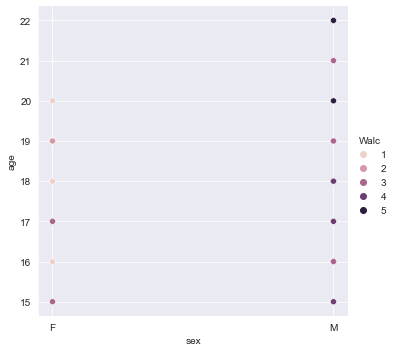

In [55]:
sns.relplot(x = 'sex', y='age', hue = 'Walc', data = data)

While at working dat student from age 17 consumes more than leave day. So student find freedom while working from home.

In [56]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<AxesSubplot:xlabel='goout', ylabel='Density'>

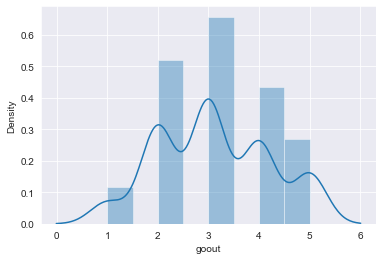

In [57]:
#checking the going out status of students
sns.distplot(data['goout'])

<AxesSubplot:xlabel='failures', ylabel='Density'>

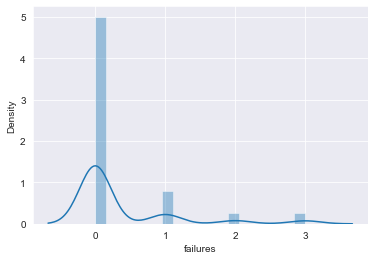

In [58]:
#checking failure rates
sns.distplot(data['failures'])

In [59]:
#alcohol consumption during free time

Dalc_no_count = len(data.loc[data['Dalc']==0])
Dalc_low_count = len(data.loc[data['Dalc']==1])
Dalc_mild_count = len(data.loc[data['Dalc']==2])
Dalc_moderate_count = len(data.loc[data['Dalc']==3])
Dalc_high_count = len(data.loc[data['Dalc']==4])
Dalc_highest_count = len(data.loc[data['Dalc']==5])


print('no consumption= ',Dalc_no_count)
print('low consumption= ',Dalc_low_count)
print ('mild consumption= ',Dalc_mild_count)
print('moderate consumption= ',Dalc_moderate_count)
print('high consumption= ',Dalc_high_count)
print('highest consumption',Dalc_highest_count)

#there are mostly low consumption of alcohol by students during free time

no consumption=  0
low consumption=  276
mild consumption=  75
moderate consumption=  26
high consumption=  9
highest consumption 9


In [60]:
#alcohol consumption during working hour

Walc_no_count = len(data.loc[data['Walc']==0])
Walc_low_count = len(data.loc[data['Walc']==1])
Walc_mild_count = len(data.loc[data['Walc']==2])
Walc_moderate_count = len(data.loc[data['Walc']==3])
Walc_high_count = len(data.loc[data['Walc']==4])
Walc_highest_count = len(data.loc[data['Walc']==5])


print('no consumption= ',Walc_no_count)
print('low consumption= ',Walc_low_count)
print ('mild consumption= ',Walc_mild_count)
print('moderate consumption= ',Walc_moderate_count)
print('high consumption= ',Walc_high_count)
print('highest consumption',Walc_highest_count)

#there are majority of student drinking mild to highest in their working time

no consumption=  0
low consumption=  151
mild consumption=  85
moderate consumption=  80
high consumption=  51
highest consumption 28


In [61]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,...,4,3,2,1,2,5,4,6,10,10


In [62]:
for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [63]:
#importing label encoder to convert string data into numerical format
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()

In [65]:

data['sex'] = le.fit_transform(data.sex)
data['famsup'] = le.fit_transform(data.famsup)
data['internet'] = le.fit_transform(data.internet)
data['romantic'] = le.fit_transform(data.romantic)

#  Feature selection

In [66]:
#result after conversion of all the data into numerical format
data.drop(['school','address','famsize','Pstatus','Mjob','Fjob'], axis=1, inplace=True)

Text(0, 0.5, 'working hour consumption')

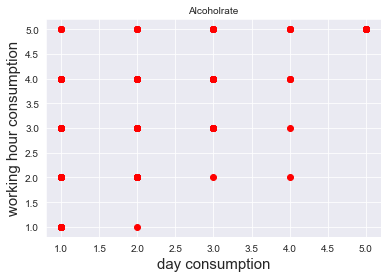

In [67]:
#checking alcoholic behaviours
dalc = data['Dalc']
walc = data['Walc']

plt.scatter(dalc,walc,label='alcohol_consumption',color = 'red')
plt.title('Alcoholrate', fontsize=10)
plt.xlabel('day consumption', fontsize= 15)
plt.ylabel('working hour consumption', fontsize =15)

In [68]:
from sklearn.model_selection import train_test_split
feature_columns = data[['sex', 'failures','famsup','internet','romantic','freetime','goout']]
predicted_class = data[['Dalc']]

In [69]:
X = feature_columns.values
y = predicted_class.values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [71]:
print("total number of rows: {0}".format(len(data)))
print("number of rows with females: {0}".format(len(data.loc[data['sex']==0])))

total number of rows: 395
number of rows with females: 208


In [72]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy = 'mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [73]:
y_train.shape

(276, 1)

In [89]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# random_search = {'criterion': ['entropy', 'gini'],
#  'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
#  'max_features': ['auto', 'sqrt','log2', None],
#  'min_samples_leaf': [4, 6, 8, 12],
#  'min_samples_split': [3, 7, 10, 14],
#  'n_estimators': list(np.linspace(5, 1200, 3, dtype = int))}

# model = RandomForestClassifier()

# modelrf = RandomizedSearchCV(estimator = model ,param_distributions = random_search, cv = 4, verbose= 5, random_state= 101, n_jobs = -1)

# modelrf.fit(X_train, y_train)

# modelrf.bestparam

In [75]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=20)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
random_forest_model.score(X_test, y_test)

0.7394957983193278

In [78]:
model.predict(X_test)

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

# KNN algorithm

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [80]:
KNN_analysis_data = data
KNN_analysis_data

,sex,age,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,4,4,r_course,g_mother,2,2,0,yes,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,r_course,g_father,1,2,0,no,...,5,3,3,1,1,3,4,5,5,6
2,0,15,1,1,r_other,g_mother,1,2,3,yes,...,4,3,2,2,3,3,10,7,8,10
3,0,15,4,2,r_home,g_mother,1,3,0,no,...,3,2,2,1,1,5,2,15,14,15
4,0,16,3,3,r_home,g_father,1,2,0,no,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,2,2,r_course,g_other,1,2,2,no,...,5,5,4,4,5,4,11,9,9,9
391,1,17,3,1,r_course,g_mother,2,1,0,no,...,2,4,5,3,4,2,3,14,16,16
392,1,21,1,1,r_course,g_other,1,1,3,no,...,5,5,3,3,3,3,3,10,8,7
393,1,18,3,2,r_course,g_mother,3,1,0,no,...,4,4,1,3,4,5,0,11,12,10


In [81]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform (X_train)
X_test = sc_X.transform(X_test)

In [82]:
import math

math.sqrt(len(y_test))

10.908712114635714

In [83]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [84]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [85]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[88  1  0  0  0]
 [14  0  0  0  0]
 [ 8  0  0  0  0]
 [ 3  0  0  0  0]
 [ 5  0  0  0  0]]


#  Cross Validation

In [92]:
# from sklearn import cross_validation
  
# # value of K is 10.
# data = cross_validation.KFold(len(X_train), n_folds=10, indices=False)

In [93]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold

# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([0, 0, 1, 1])
# skf = StratifiedKFold(n_splits=2)

# for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [97]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [99]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
print(models)

[('LR', LinearRegression()), ('KNN', KNeighborsClassifier())]


In [101]:
results = dict()
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = (cv_results.mean(), cv_results.std())
    names.append(name)
print()
print('name results.mean result.std')
for key, value in results.items():
    print(key, value)

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=2.